# PRCP-1000-Protugese Bank Portugese Bank Marketing Project	

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# Team id = 1066


In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import sys
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
if len(sys.argv) > 1 and os.path.exists(sys.argv[1]):
    csv_path = sys.argv[1]
else:
    csv_path = r'E:\data_science\bank.csv'

data = pd.read_csv(csv_path,encoding='utf-8', delimiter=';')
data.head(30)

age            job   marital  education default  balance housing loan  \
0    30     unemployed   married    primary      no     1787      no   no   
1    33       services   married  secondary      no     4789     yes  yes   
2    35     management    single   tertiary      no     1350     yes   no   
3    30     management   married   tertiary      no     1476     yes  yes   
4    59    blue-collar   married  secondary      no        0     yes   no   
5    35     management    single   tertiary      no      747      no   no   
6    36  self-employed   married   tertiary      no      307     yes   no   
7    39     technician   married  secondary      no      147     yes   no   
8    41   entrepreneur   married   tertiary      no      221     yes   no   
9    43       services   married    primary      no      -88     yes  yes   
10   39       services   married  secondary      no     9374     yes   no   
11   43         admin.   married  secondary      no      264     yes   no   
12   36     technician   married   tertiary      no     1109      no   no   
13   20        student    single  secondary      no      502      no   no   
14   31    blue-collar   married  secondary      no      360     yes  yes   
15   40     management   married   tertiary      no      194      no  yes   
16   56     technician   married  secondary      no     4073      no   no   
17   37         admin.    single   tertiary      no     2317     yes   no   
18   25    blue-collar    single    primary      no     -221     yes   no   
19   31       services   married  secondary      no      132      no   no   
20   38     management  divorced    unknown      no        0     yes   no   
21   42     management  divorced   tertiary      no       16      no   no   
22   44       services    single  secondary      no      106      no   no   
23   44   entrepreneur   married  secondary      no       93      no   no   
24   26      housemaid   married   tertiary      no      543      no   no   
25   41     management   married   tertiary      no     5883      no   no   
26   55    blue-collar   married    primary      no      627     yes   no   
27   67        retired   married    unknown      no      696      no   no   
28   56  self-employed   married  secondary      no      784      no  yes   
29   53         admin.   married  secondary      no      105      no  yes   

      contact  day month  duration  campaign  pdays  previous poutcome    y  
0    cellular   19   oct        79         1     -1         0  unknown   no  
1    cellular   11   may       220         1    339         4  failure   no  
2    cellular   16   apr       185         1    330         1  failure   no  
3     unknown    3   jun       199         4     -1         0  unknown   no  
4     unknown    5   may       226         1     -1         0  unknown   no  
5    cellular   23   feb       141         2    176         3  failure   no  
6    cellular   14   may       341         1    330         2    other   no  
7    cellular    6   may       151         2     -1         0  unknown   no  
8     unknown   14   may        57         2     -1         0  unknown   no  
9    cellular   17   apr       313         1    147         2  failure   no  
10    unknown   20   may       273         1     -1         0  unknown   no  
11   cellular   17   apr       113         2     -1         0  unknown   no  
12   cellular   13   aug       328         2     -1         0  unknown   no  
13   cellular   30   apr       261         1     -1         0  unknown  yes  
14   cellular   29   jan        89         1    241         1  failure   no  
15   cellular   29   aug       189         2     -1         0  unknown   no  
16   cellular   27   aug       239         5     -1         0  unknown   no  
17   cellular   20   apr       114         1    152         2  failure   no  
18    unknown   23   may       250         1     -1         0  unknown   no  
19   cellular    7   jul       148         1    152     

In [3]:
data.shape

(4521, 17)

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [6]:
datacorr = data.corr()
datacorr

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000

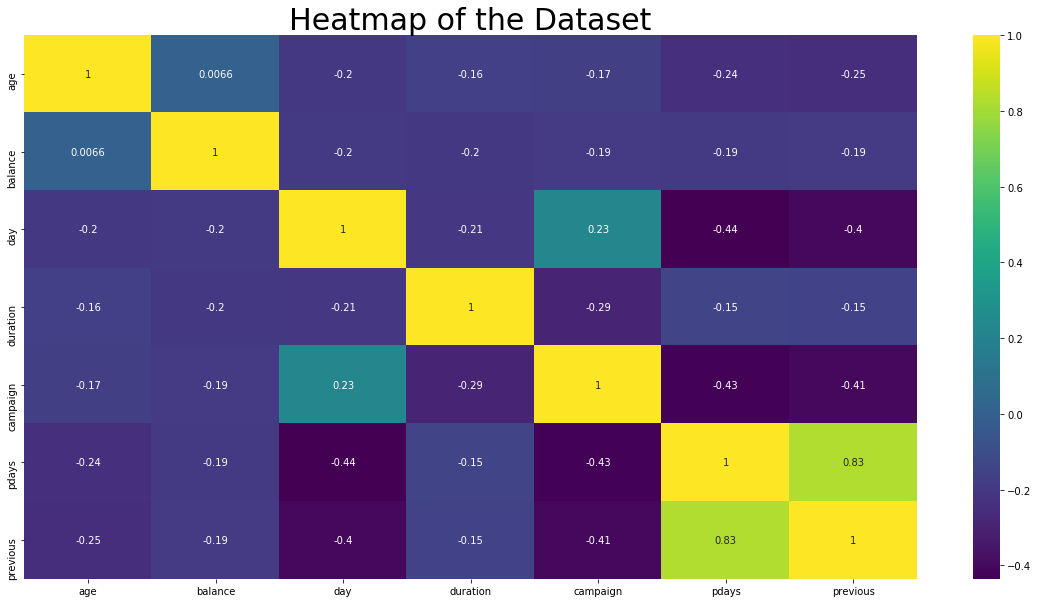

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.housing = enc.fit_transform(data.housing)
data.loan = enc.fit_transform(data.loan)
data.education = enc.fit_transform(data.education)
data.y = enc.fit_transform(data.y)
data.job = enc.fit_transform(data.job)
data.marital = enc.fit_transform(data.marital)
data.default= enc.fit_transform(data.default)
data.contact= enc.fit_transform(data.contact)
data.month= enc.fit_transform(data.month)
data.poutcome= enc.fit_transform(data.poutcome)
data.head(10)


age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   
5   35    4        2          2        0      747        0     0        0   
6   36    6        1          2        0      307        1     0        0   
7   39    9        1          1        0      147        1     0        0   
8   41    2        1          2        0      221        1     0        2   
9   43    7        1          0        0      -88        1     1        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  
5   23      3       141         2    176         3         0  0  
6   14      8       341         1    330         2         1  0  
7    6      8       151         2     -1         0         3  0  
8   14      8        57         2     -1         0         3  0  
9   17      0       313         1    147         2         0  0

In [12]:
X= data.drop(['y'],axis=1)
y= data['y']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [14]:
#let's scale the values so that it would better enable the model to predict the output
MM = MinMaxScaler(feature_range = (0, 1))
X =MM.fit_transform(X)
X

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.55882353, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.13235294, 0.09090909, 0.5       , ..., 0.24311927, 0.12      ,
        0.33333333],
       [0.36764706, 0.18181818, 1.        , ..., 0.28669725, 0.28      ,
        0.33333333]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
X= pd.DataFrame(pca.fit_transform(X))
X.head()

0         1         2         3         4         5         6   \
0 -0.531052 -0.218746 -0.122245 -0.042692  0.016328  0.259026  0.142618   
1  0.164249  0.883198  0.734645  0.521873  0.525399  0.311059  0.051563   
2 -0.064171  0.961383 -0.292057  0.165368  0.452729 -0.141733  0.039406   
3  0.756287 -0.264355  0.764768  0.001211  0.340376  0.144834 -0.391812   
4  0.818993 -0.313317 -0.134530  0.222487 -0.130387 -0.127839 -0.331988   

         7         8         9         10        11        12        13  \
0 -0.161178 -0.768825  0.226603 -0.079037 -0.060717 -0.030315 -0.001750   
1 -0.079555 -0.121662  0.105236 -0.056233 -0.013372 -0.002131  0.076101   
2 -0.193751  0.589845 -0.030081  0.020602 -0.022455 -0.037488  0.053877   
3  0.210970  0.305477  0.105498 -0.068430 -0.024476  0.028052 -0.008029   
4  0.068330  0.018507 -0.249977  0.040816 -0.013848 -0.026260  0.000404   

         14        15  
0 -0.009073  0.008811  
1  0.005236  0.054970  
2 -0.102449  0.000564  
3  0.001810  0.009684  
4  0.001647 -0.027542

In [16]:
pca.explained_variance_ratio_

array([0.2550407 , 0.17617066, 0.11458652, 0.09044653, 0.08439703,
       0.0726247 , 0.06436367, 0.04974601, 0.04630926, 0.01595603,
       0.01419434, 0.00645975, 0.00330458, 0.0027286 , 0.00229266,
       0.00137898])

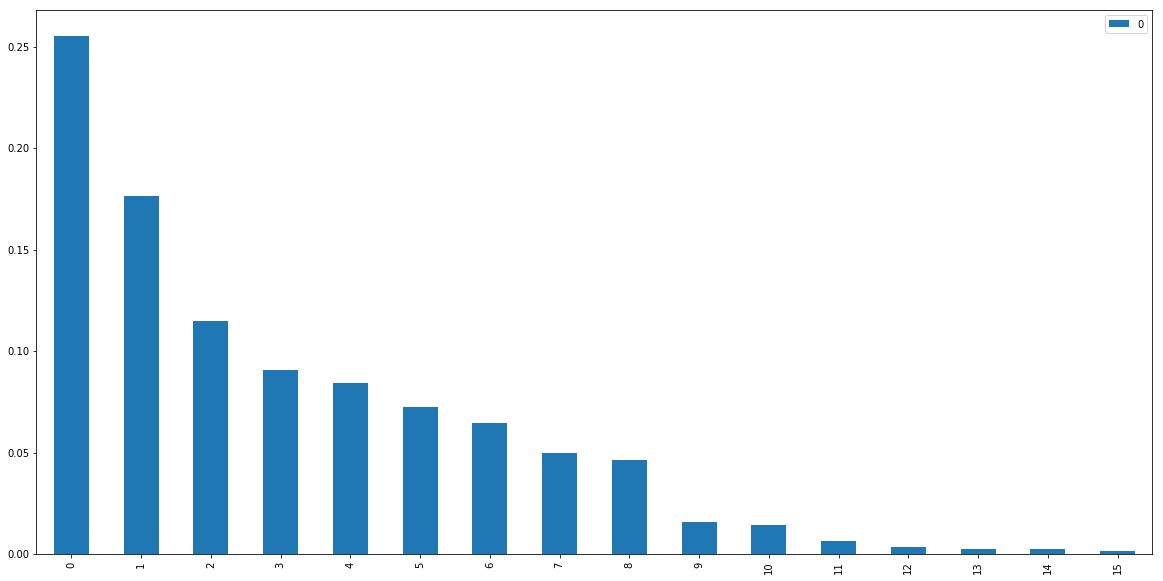

In [17]:
iris_var = pd.DataFrame(pca.explained_variance_ratio_)
iris_var.plot(kind='bar')

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

# RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_estimators=100,random_state=10)
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8938992042440318

In [20]:
pd.crosstab(y_test,y_predict)

col_0    0   1
y             
0      969  39
1       81  42

# Logisticregression

In [21]:
logit = LogisticRegression(max_iter=100000)
logit.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8938992042440318

In [22]:
pd.crosstab(y_test,y_predict)

col_0    0   1
y             
0      969  39
1       81  42

# DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8567639257294429

In [24]:
pd.crosstab(y_test,y_predict)

col_0    0   1
y             
0      914  94
1       68  55

# XGBClassifier

In [25]:
from xgboost import XGBClassifier
import pandas.util.testing as tm

C:\Users\User\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
model=XGBClassifier(learning_rate=0.7,n_estimators=250,random_state=10)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
accuracy_score(y_test,y_predict)


0.8938992042440318

In [27]:
pd.crosstab(y_test,y_predict)

col_0    0   1
y             
0      967  41
1       79  44